# Wine Dataset

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine = fetch_ucirepo(id=109)

# data (as pandas dataframes)
X = wine.data.features
y = wine.data.targets

# metadata
print(wine.metadata)

# variable information
print(wine.variables)


{'uci_id': 109, 'name': 'Wine', 'repository_url': 'https://archive.ics.uci.edu/dataset/109/wine', 'data_url': 'https://archive.ics.uci.edu/static/public/109/data.csv', 'abstract': 'Using chemical analysis to determine the origin of wines', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 178, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1992, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C5PC7J', 'creators': ['Stefan Aeberhard', 'M. Forina'], 'intro_paper': {'ID': 246, 'type': 'NATIVE', 'title': 'Comparative analysis of statistical pattern recognition methods in high dimensional settings', 'authors': 'S. Aeberhard, D. Coomans, O. Vel', 'venue': 'Pattern Recognition', 'year': 1994, 'journal': None, 'DOI': '10.1016/0031-3203(94)90145-7', 'URL': 'https:

In [ ]:
X.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
y

,class
0,1
1,1
2,1
3,1
4,1
...,...
173,3
174,3
175,3
176,3


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#Linear SVC

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

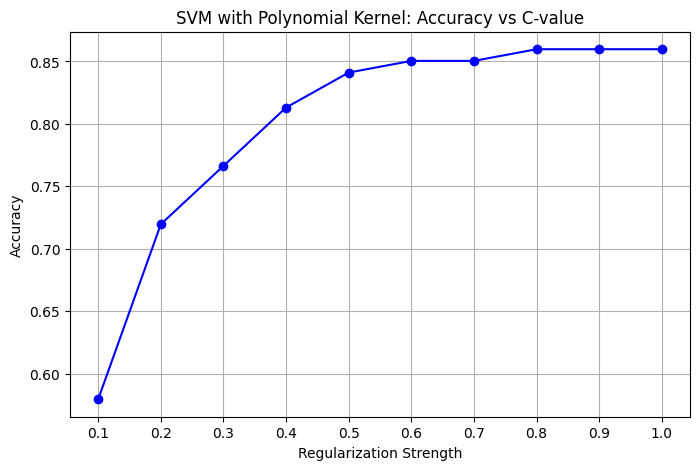

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = []

# Evaluate performance for each degree
for C_val in C_vals:
    clf = SVC(kernel='poly', C=C_val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_vals, scores, marker='o', linestyle='-', color='blue')
plt.title("SVM with Polynomial Kernel: Accuracy vs C-value")
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(C_vals)
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier_linear = SVC(kernel='linear', C=0.9, gamma='scale')
classifier_linear.fit(X_train, y_train)
y_pred_linear = classifier_linear.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_linear))
print(accuracy_score(y_test, y_pred_linear) * 100)
print(confusion_matrix(y_test, y_pred_linear))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        36
           2       1.00      0.88      0.94        43
           3       0.93      1.00      0.97        28

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.96      0.95      0.95       107

95.32710280373831
[[36  0  0]
 [ 3 38  2]
 [ 0  0 28]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.92      1.00      0.96        36
           2       1.00      0.88      0.94        43
           3       0.93      1.00      0.97        28

    accuracy                           0.95       107
   macro avg       0.95      0.96      0.95       107
weighted avg       0.96      0.95      0.95       107

Accuracy: 95.33%
[[36  0  0]
 [ 3 38  2]
 [ 0  0 28]]


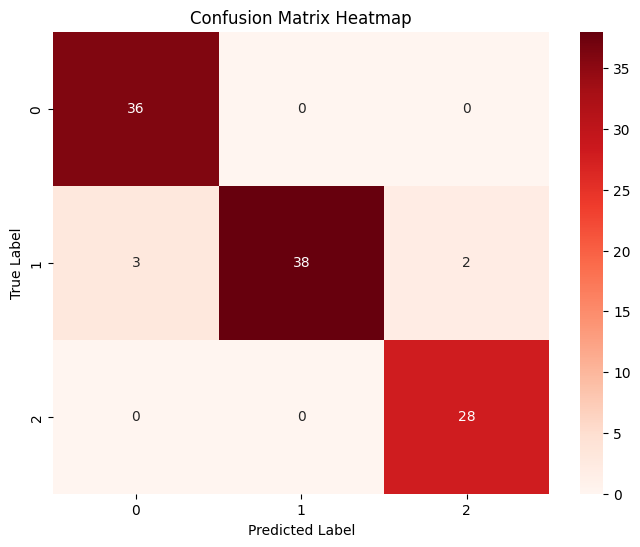

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_linear))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_linear) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


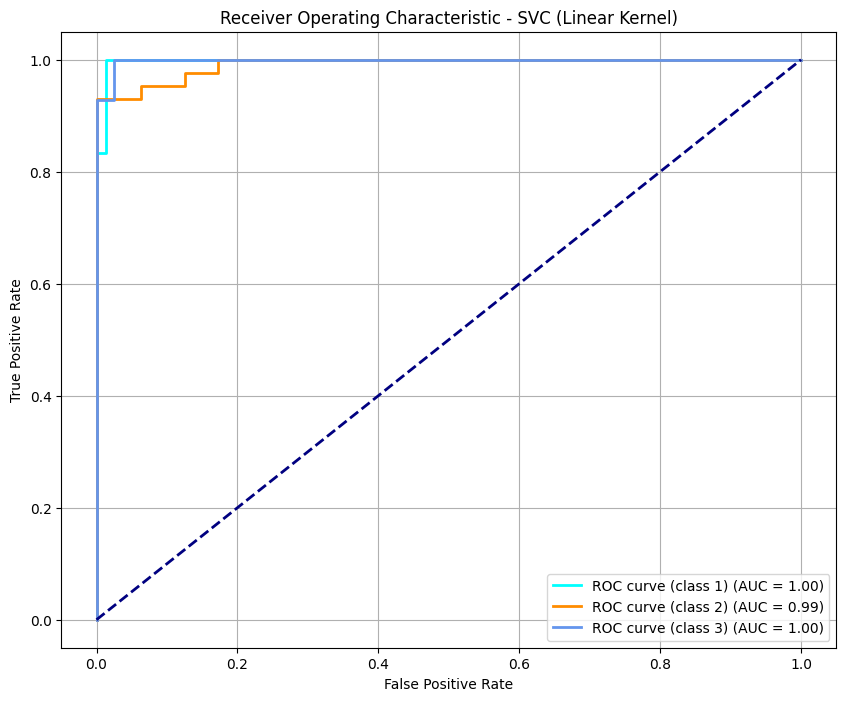

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
classifier_linear = SVC(kernel='linear', C=0.9, gamma='scale', probability=True)
classifier_linear.fit(X_train, y_train)

# Get predicted probabilities
y_scores = classifier_linear.predict_proba(X_test)

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Linear Kernel)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Polynomial SVC

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

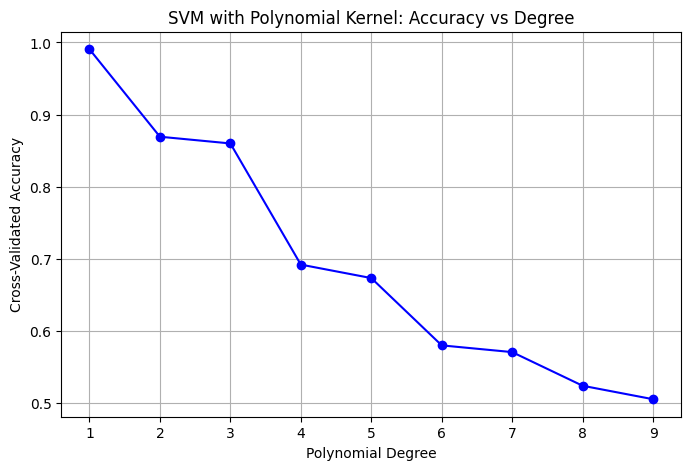

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

degrees = range(1, 10)
scores = []

# Evaluate performance for each degree
for d in degrees:
    clf = SVC(kernel='poly', degree=d, C=1, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(degrees, scores, marker='o', linestyle='-', color='blue')
plt.title("SVM with Polynomial Kernel: Accuracy vs Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Cross-Validated Accuracy")
plt.grid(True)
plt.xticks(degrees)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

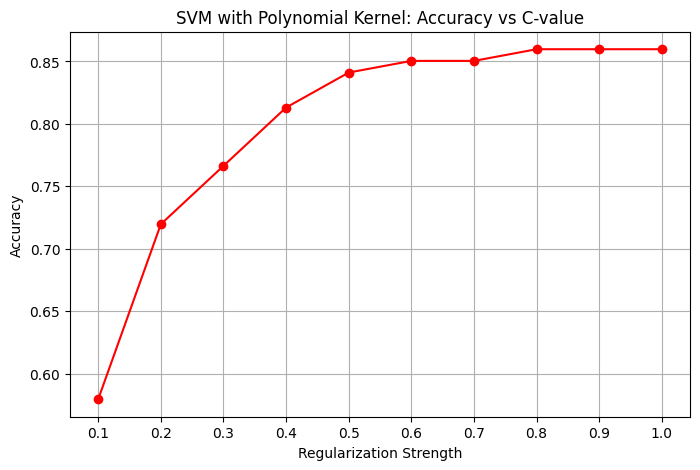

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

C_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = []

# Evaluate performance for each degree
for C_val in C_vals:
    clf = SVC(kernel='poly', degree=3, C=C_val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_vals, scores, marker='o', linestyle='-', color='red')
plt.title("SVM with Polynomial Kernel: Accuracy vs C-value")
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(C_vals)
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier_poly = SVC(kernel='poly', degree=3, C=0.9, gamma='scale')
classifier_poly.fit(X_train, y_train)
y_pred_poly = classifier_poly.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_poly))
print(accuracy_score(y_test, y_pred_poly) * 100)
print(confusion_matrix(y_test, y_pred_poly))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.93      0.75      0.83        36
           2       0.76      0.95      0.85        43
           3       1.00      0.86      0.92        28

    accuracy                           0.86       107
   macro avg       0.90      0.85      0.87       107
weighted avg       0.88      0.86      0.86       107

85.98130841121495
[[27  9  0]
 [ 2 41  0]
 [ 0  4 24]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.93      0.75      0.83        36
           2       0.76      0.95      0.85        43
           3       1.00      0.86      0.92        28

    accuracy                           0.86       107
   macro avg       0.90      0.85      0.87       107
weighted avg       0.88      0.86      0.86       107

Accuracy: 85.98%
[[27  9  0]
 [ 2 41  0]
 [ 0  4 24]]


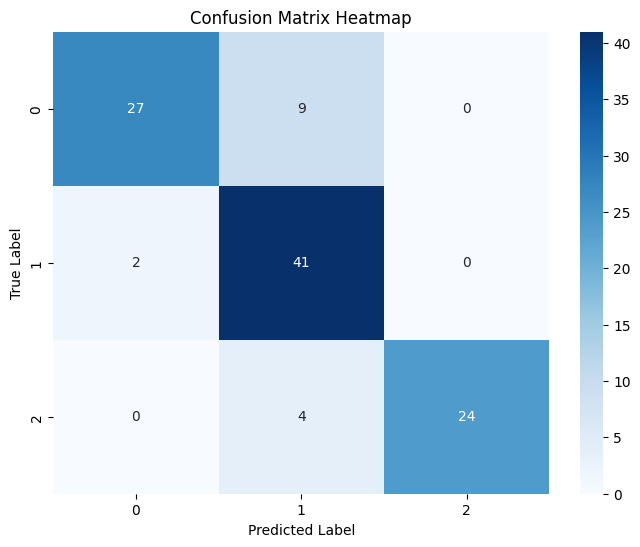

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_poly))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_poly) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_poly)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

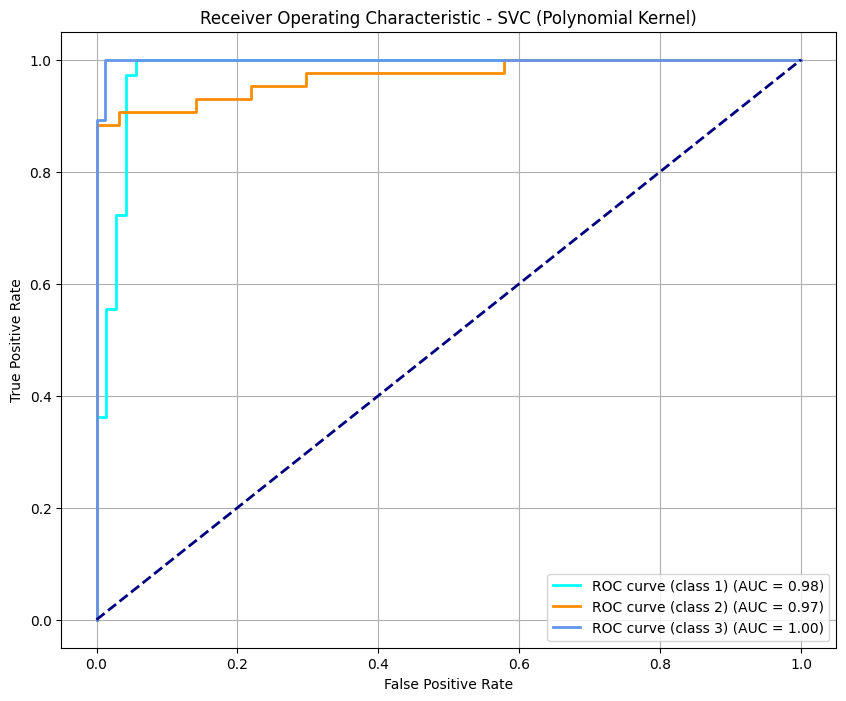

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
classifier_poly = SVC(kernel='poly', degree=3, C=0.9, gamma='scale', probability=True) # Set probability=True
classifier_poly.fit(X_train, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array

# Get predicted probabilities
y_scores = classifier_poly.predict_proba(X_test) # Use predict_proba

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Polynomial Kernel)') # Updated title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Gaussian SVC

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

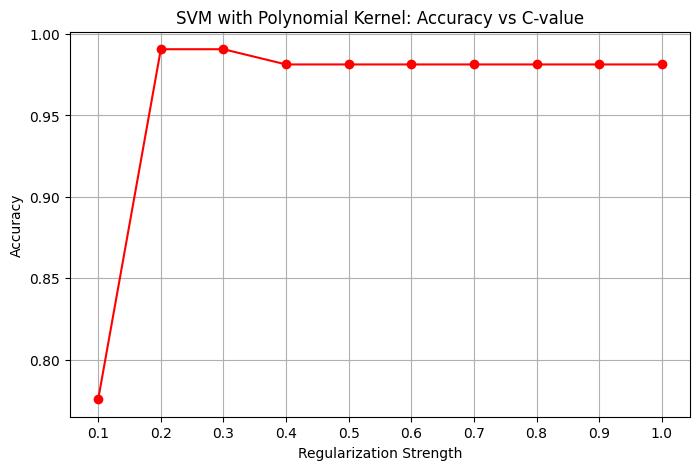

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

C_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = []

# Evaluate performance for each degree
for C_val in C_vals:
    clf = SVC(kernel='rbf', C=C_val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_vals, scores, marker='o', linestyle='-', color='red')
plt.title("SVM with Polynomial Kernel: Accuracy vs C-value")
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(C_vals)
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier_gaussian = SVC(kernel='rbf', C=0.3, gamma='scale')
classifier_gaussian.fit(X_train, y_train)
y_pred_gaussian = classifier_gaussian.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_gaussian))
print(accuracy_score(y_test, y_pred_gaussian) * 100)
print(confusion_matrix(y_test, y_pred_gaussian))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        36
           2       0.98      1.00      0.99        43
           3       1.00      1.00      1.00        28

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107

99.06542056074767
[[35  1  0]
 [ 0 43  0]
 [ 0  0 28]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        36
           2       0.98      1.00      0.99        43
           3       1.00      1.00      1.00        28

    accuracy                           0.99       107
   macro avg       0.99      0.99      0.99       107
weighted avg       0.99      0.99      0.99       107

Accuracy: 99.07%
[[35  1  0]
 [ 0 43  0]
 [ 0  0 28]]


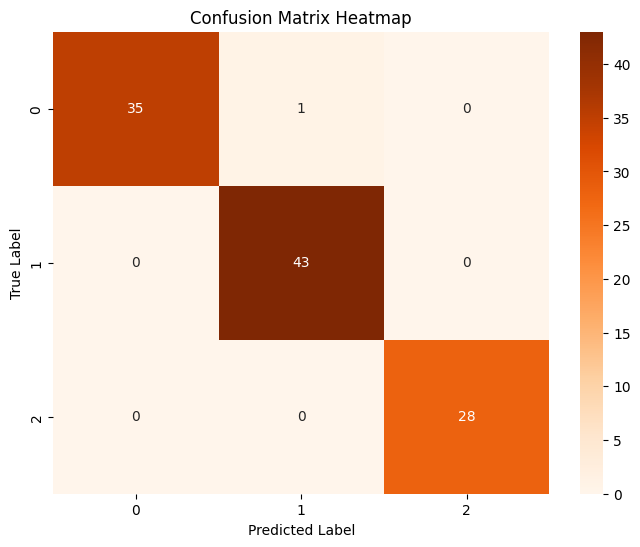

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_gaussian))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_gaussian) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_gaussian)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

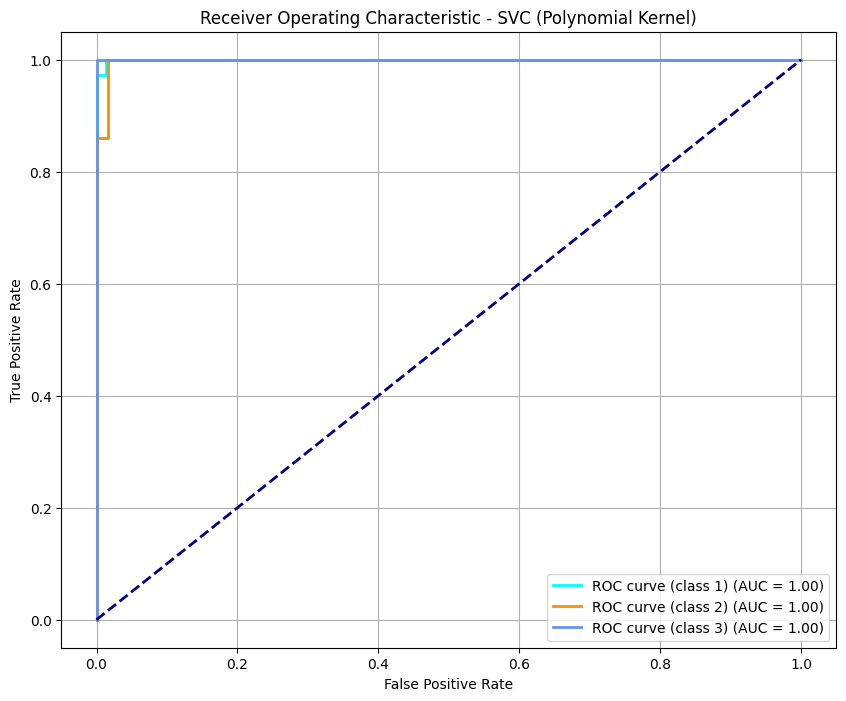

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
classifier_gaussian = SVC(kernel='rbf', C=0.3, gamma='scale', probability=True)
classifier_gaussian.fit(X_train, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array

# Get predicted probabilities
y_scores = classifier_gaussian.predict_proba(X_test) # Use predict_proba

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Polynomial Kernel)') # Updated title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Sigmoid SVC

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

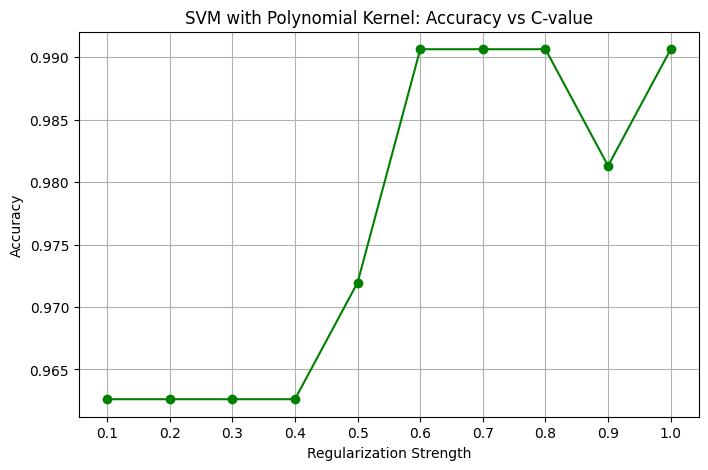

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

C_vals = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
scores = []

# Evaluate performance for each degree
for C_val in C_vals:
    clf = SVC(kernel='sigmoid', C=C_val, gamma='scale')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(C_vals, scores, marker='o', linestyle='-', color='green')
plt.title("SVM with Polynomial Kernel: Accuracy vs C-value")
plt.xlabel("Regularization Strength")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(C_vals)
plt.show()

In [ ]:
from sklearn.svm import SVC
classifier_sigmoid = SVC(kernel='sigmoid', C=0.3, gamma='scale')
classifier_sigmoid.fit(X_train, y_train)
y_pred_sigmoid = classifier_sigmoid.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_sigmoid))
print(accuracy_score(y_test, y_pred_sigmoid) * 100)
print(confusion_matrix(y_test, y_pred_sigmoid))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        36
           2       1.00      0.91      0.95        43
           3       1.00      1.00      1.00        28

    accuracy                           0.96       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.96      0.96       107

96.26168224299066
[[36  0  0]
 [ 4 39  0]
 [ 0  0 28]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95        36
           2       1.00      0.91      0.95        43
           3       1.00      1.00      1.00        28

    accuracy                           0.96       107
   macro avg       0.97      0.97      0.97       107
weighted avg       0.97      0.96      0.96       107

Accuracy: 96.26%
[[36  0  0]
 [ 4 39  0]
 [ 0  0 28]]


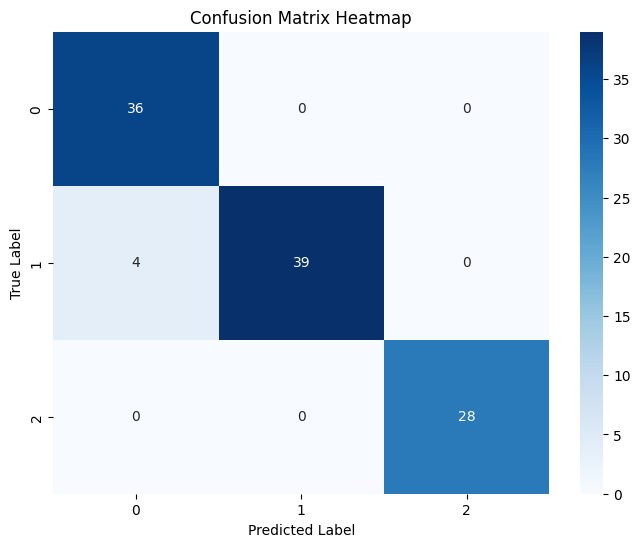

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_sigmoid))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_sigmoid) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_sigmoid)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


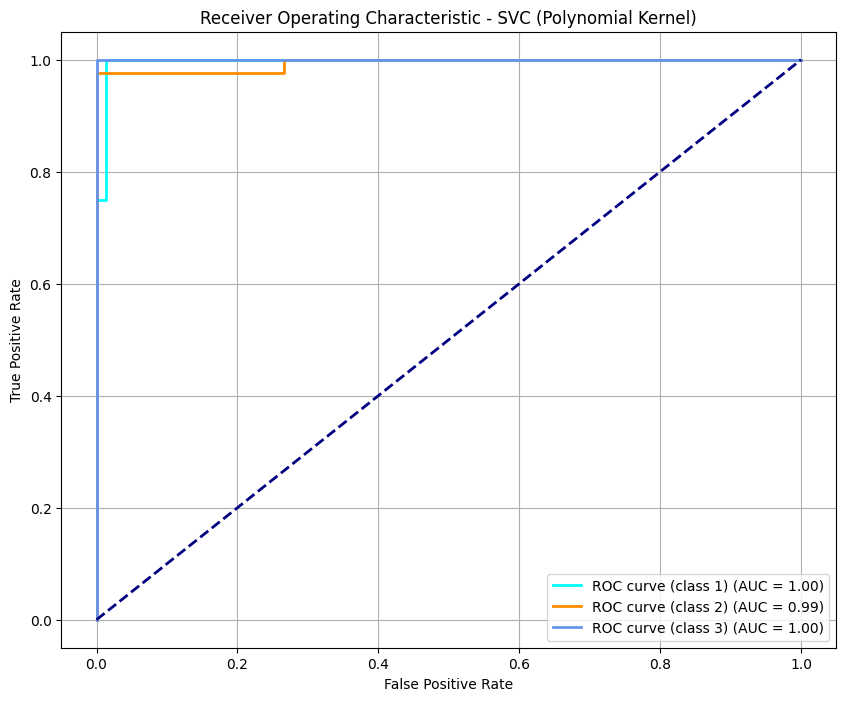

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
classifier_sigmoid = SVC(kernel='sigmoid', C=0.3, gamma='scale', probability=True)
classifier_sigmoid.fit(X_train, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array

# Get predicted probabilities
y_scores = classifier_sigmoid.predict_proba(X_test) # Use predict_proba

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Polynomial Kernel)') # Updated title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

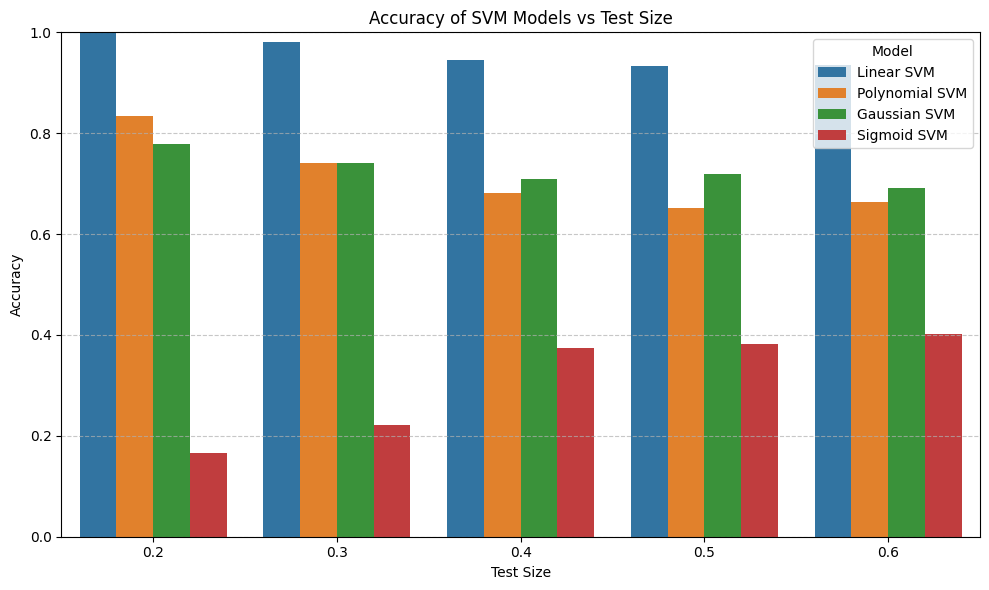

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Test sizes to evaluate
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6]

# Models to evaluate
models = {
    'Linear SVM': SVC(kernel='linear', C=0.7, gamma='scale'),
    'Polynomial SVM': SVC(kernel='poly', degree=2, C=0.9, gamma='scale'),
    'Gaussian SVM': SVC(kernel='rbf', C=0.3, gamma='scale'),
    'Sigmoid SVM': SVC(kernel='sigmoid')
}

# Collect accuracy results
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append({
            'Model': name,
            'Test Size': test_size,
            'Accuracy': acc
        })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Test Size', y='Accuracy', hue='Model')
plt.title('Accuracy of SVM Models vs Test Size')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Model')
plt.tight_layout()
plt.show()

#MLP Classification

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iter

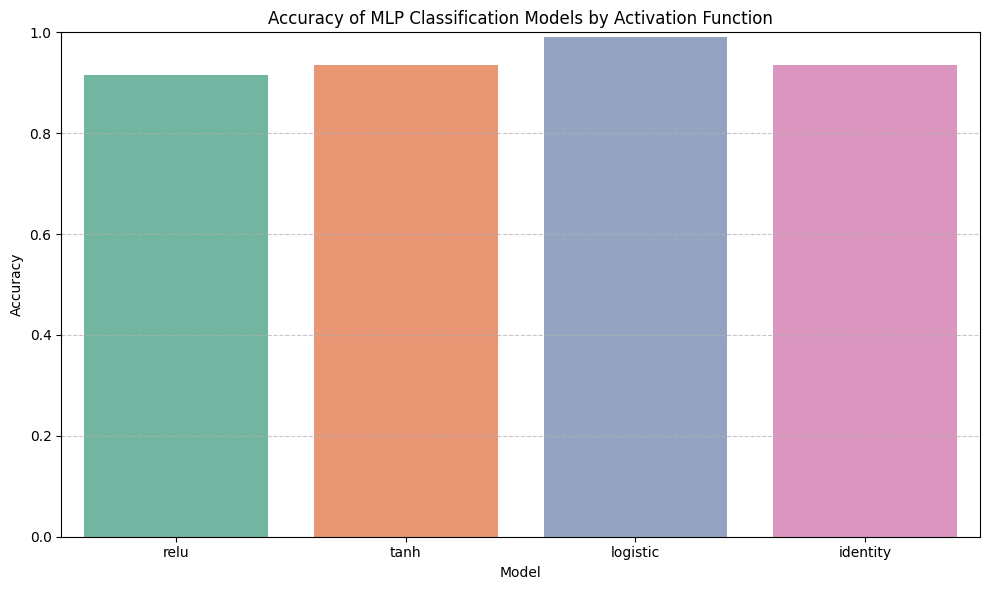

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


models = {
    'relu': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="relu", max_iter=1000, random_state=42),
    'tanh': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", max_iter=1000, random_state=42),
    'logistic': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="logistic", max_iter=1000, random_state=42),
    'identity': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="identity", max_iter=1000, random_state=42)
}

# Collect accuracy results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='Set2')
plt.title('Accuracy of MLP Classification Models by Activation Function')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipython-input-4232060599.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign

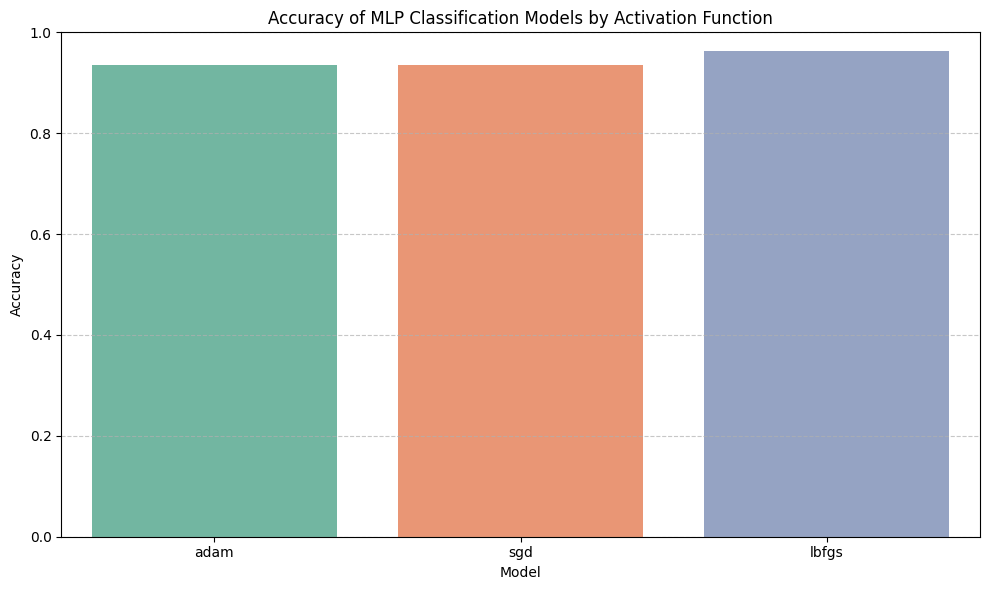

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier


models = {
    'adam': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="adam", max_iter=1000, random_state=42),
    'sgd': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="sgd", max_iter=1000, random_state=42),
    'lbfgs': MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="lbfgs", max_iter=1000, random_state=42),
}

# Collect accuracy results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='Set2')
plt.title('Accuracy of MLP Classification Models by Activation Function')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


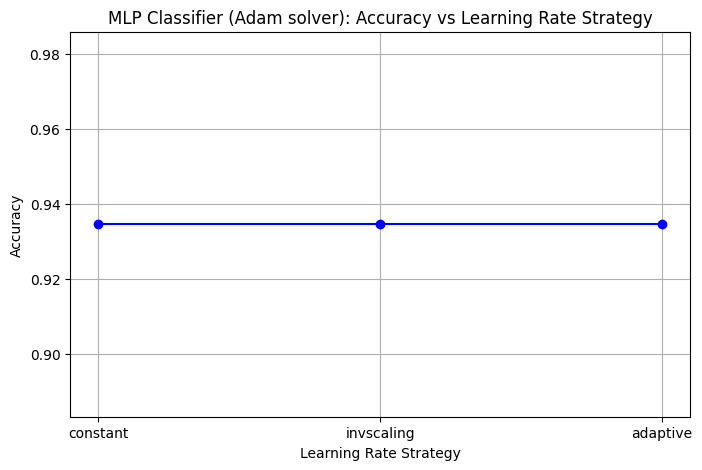

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score # Import accuracy_score

learning_rate_strategies = ['constant', 'invscaling', 'adaptive']
scores = []

# Evaluate performance for each learning_rate strategy
for learning_rate_strategy in learning_rate_strategies:
    # Use solver='adam' and explore different learning_rate strategies
    clf = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="adam", learning_rate=learning_rate_strategy, max_iter=1000, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(learning_rate_strategies, scores, marker='o', linestyle='-', color='blue')
plt.title("MLP Classifier (Adam solver): Accuracy vs Learning Rate Strategy")
plt.xlabel("Learning Rate Strategy")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(learning_rate_strategies)
plt.show()

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="adam", momentum=0.9, learning_rate='adaptive', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_mlp))
print(accuracy_score(y_test, y_pred_mlp) * 100)
print(confusion_matrix(y_test, y_pred_mlp))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        36
           2       0.95      0.88      0.92        43
           3       0.90      1.00      0.95        28

    accuracy                           0.93       107
   macro avg       0.93      0.94      0.94       107
weighted avg       0.94      0.93      0.93       107

93.45794392523365
[[34  2  0]
 [ 2 38  3]
 [ 0  0 28]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        36
           2       0.95      0.88      0.92        43
           3       0.90      1.00      0.95        28

    accuracy                           0.93       107
   macro avg       0.93      0.94      0.94       107
weighted avg       0.94      0.93      0.93       107

Accuracy: 93.46%
[[34  2  0]
 [ 2 38  3]
 [ 0  0 28]]


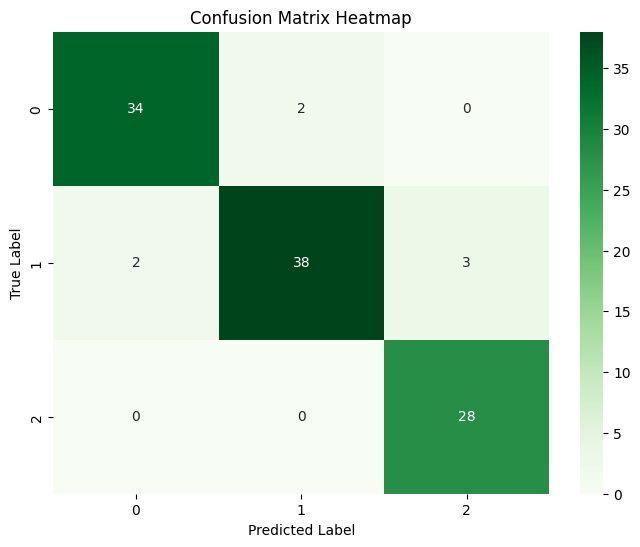

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_mlp))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_mlp) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_mlp)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

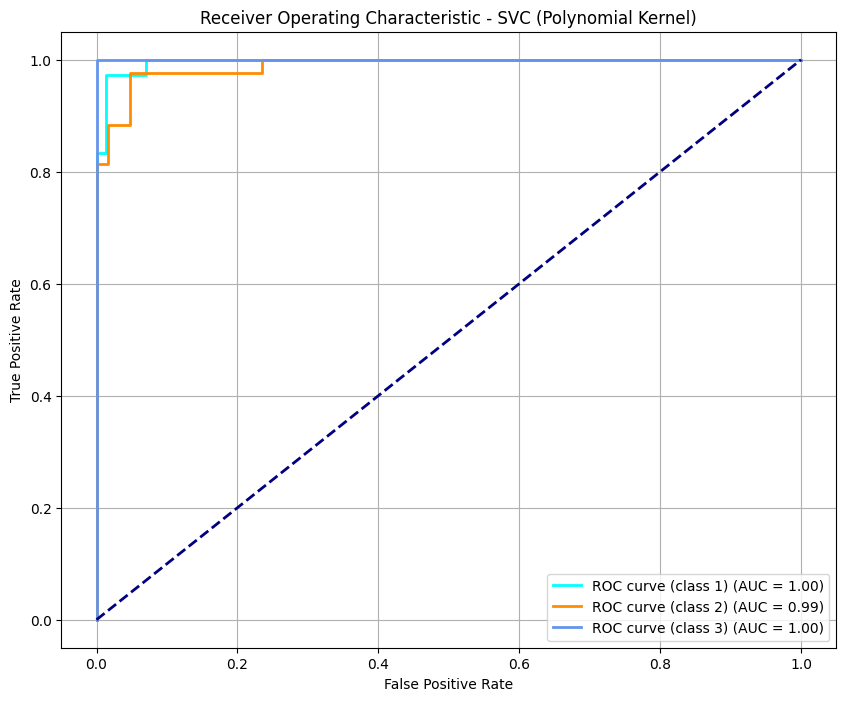

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), activation="tanh", solver="adam", momentum=0.9, learning_rate='adaptive', max_iter=1000, random_state=42)
mlp.fit(X_train, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array

# Get predicted probabilities
y_scores = mlp.predict_proba(X_test) # Use predict_proba

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Polynomial Kernel)') # Updated title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#Random Forest Classifier

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

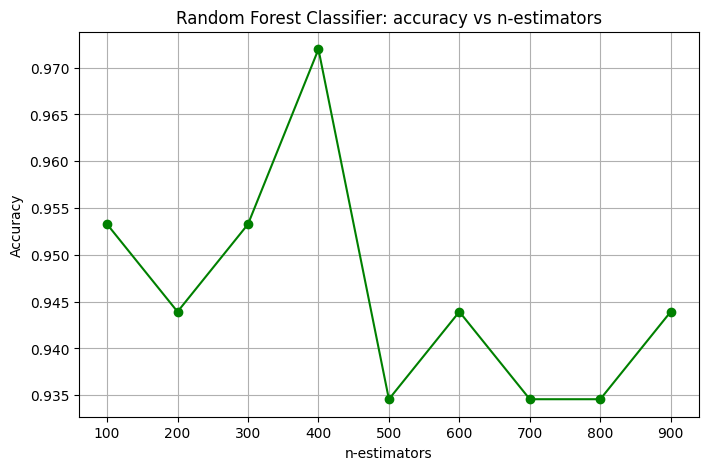

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


estimators = [100, 200, 300, 400, 500, 600, 700, 800, 900]
scores = []

# Evaluate performance for each degree
for estimator in estimators:
    clf = RandomForestClassifier(n_estimators=estimator)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(estimators, scores, marker='o', linestyle='-', color='green')
plt.title("Random Forest Classifier: accuracy vs n-estimators")
plt.xlabel("n-estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(estimators)
plt.show()

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/tmp/ipython-input-3637809049.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the

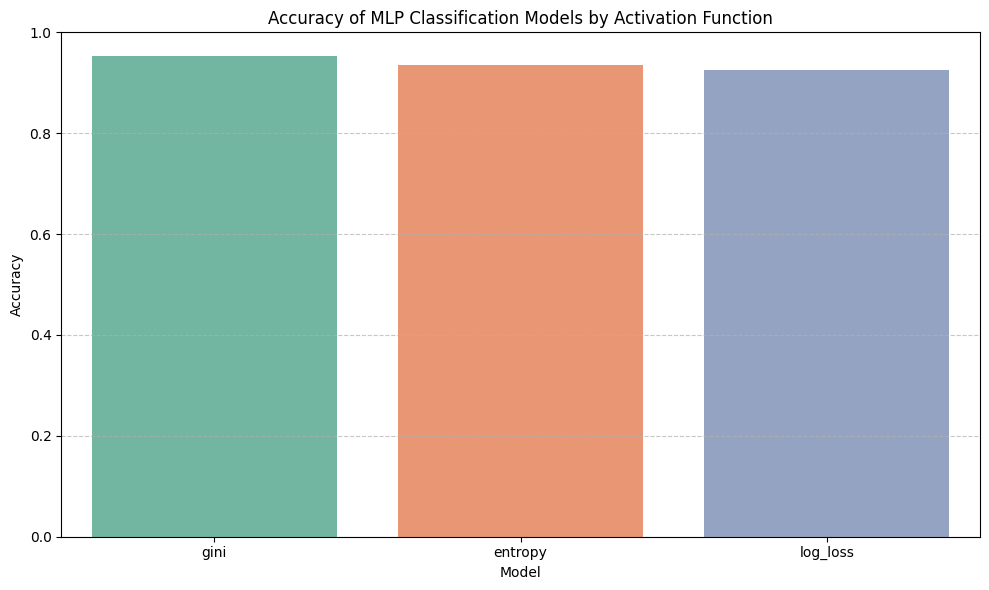

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


models = {
    'gini': RandomForestClassifier(n_estimators=200, criterion='gini'),
    'entropy': RandomForestClassifier(n_estimators=200, criterion='entropy'),
    'log_loss': RandomForestClassifier(n_estimators=200, criterion='log_loss'),
}

# Collect accuracy results
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': acc
    })

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=df_results, x='Model', y='Accuracy', palette='Set2')
plt.title('Accuracy of MLP Classification Models by Activation Function')
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(n_estimators=200, criterion='gini')
classifier_rf.fit(X_train, y_train)

y_pred_rf = classifier_rf.predict(X_test)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Confusion Matrix:")

print("--------------------------------------------------------")
print("--------------------------------------------------------")

print("Performance Evaluation:")
print(classification_report(y_test, y_pred_rf))
print(accuracy_score(y_test, y_pred_rf) * 100)
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.97      0.94      0.96        36
           2       0.89      0.95      0.92        43
           3       0.96      0.89      0.93        28

    accuracy                           0.93       107
   macro avg       0.94      0.93      0.94       107
weighted avg       0.94      0.93      0.93       107

93.45794392523365
[[34  2  0]
 [ 1 41  1]
 [ 0  3 25]]


Confusion Matrix:
--------------------------------------------------------
--------------------------------------------------------
Performance Evaluation:
              precision    recall  f1-score   support

           1       0.97      0.94      0.96        36
           2       0.89      0.95      0.92        43
           3       0.96      0.89      0.93        28

    accuracy                           0.93       107
   macro avg       0.94      0.93      0.94       107
weighted avg       0.94      0.93      0.93       107

Accuracy: 93.46%
[[34  2  0]
 [ 1 41  1]
 [ 0  3 25]]


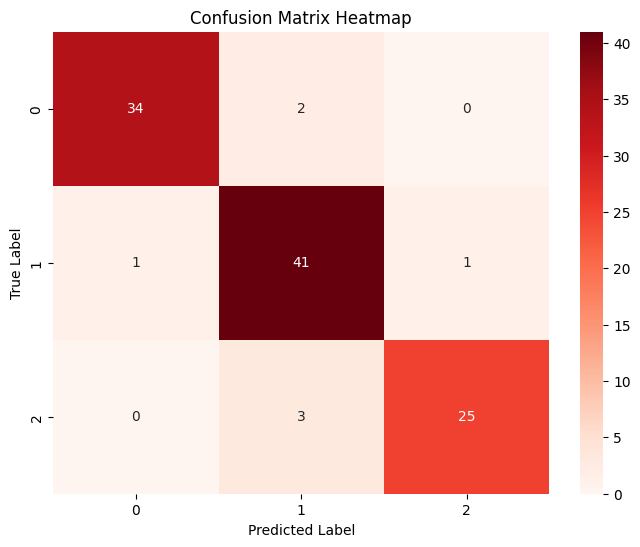

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming y_test and y_pred_sigmoid are defined

print("Confusion Matrix:")
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Performance Evaluation:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_rf) * 100))

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print(cm)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=True)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

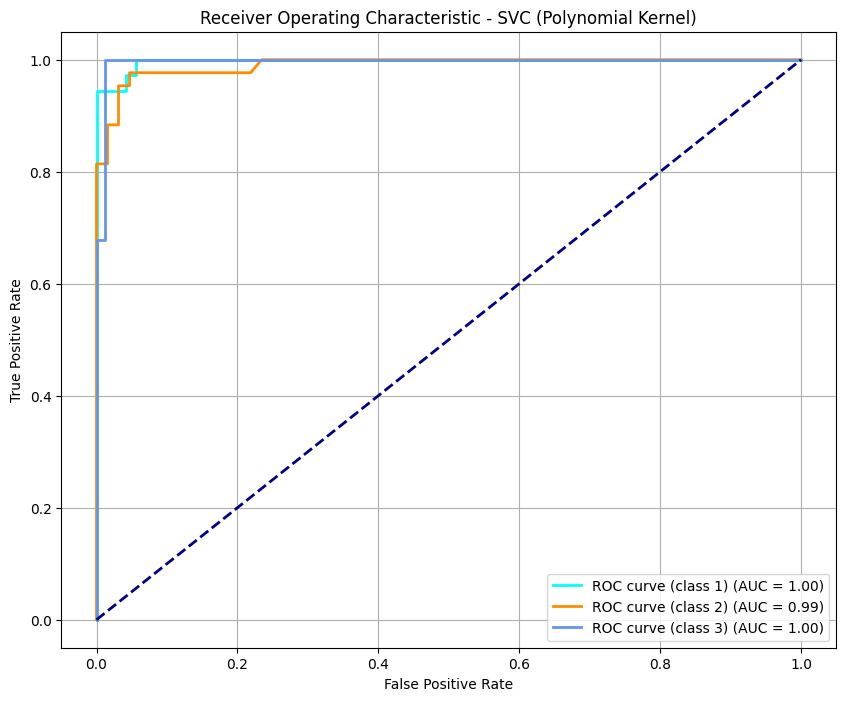

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import numpy as np

# Train the model with probability=True
# Ensure probability=True is set for predict_proba to work
classifier_rf = RandomForestClassifier(n_estimators=200, criterion='gini')
classifier_rf.fit(X_train, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array

# Get predicted probabilities
y_scores = classifier_rf.predict_proba(X_test) # Use predict_proba

# Binarize the true labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # Use y_test_bin[:, i] which is the binarized true labels for class i
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting the ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.2f})')

# Plot the random guess line
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVC (Polynomial Kernel)') # Updated title
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

#PCA

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [6]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# PCA to preserve 95% of variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

PCA reduced dimensions: 10
Classifier: Linear SVM
Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.91      0.95        22
           3       0.92      1.00      0.96        11

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

------------------------------------------------------------


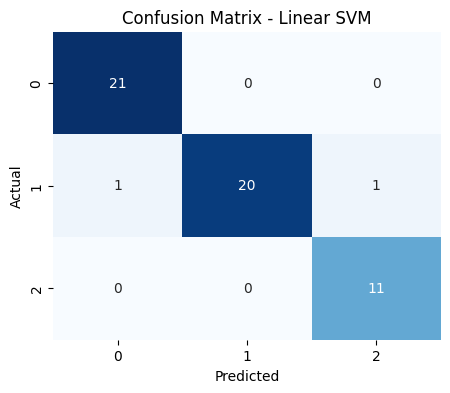

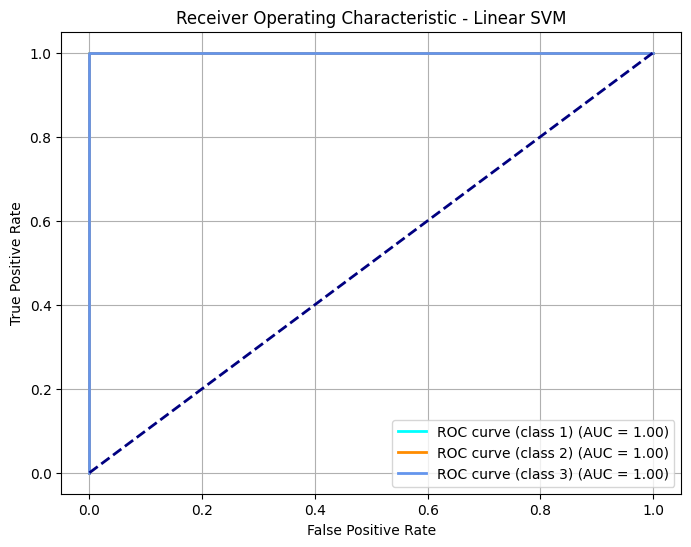

Classifier: Polynomial SVM
Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.95      0.98        21
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        11

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

------------------------------------------------------------


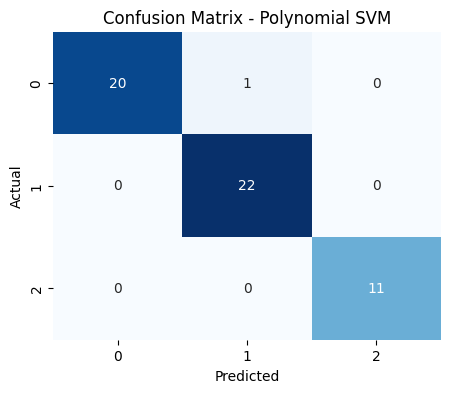

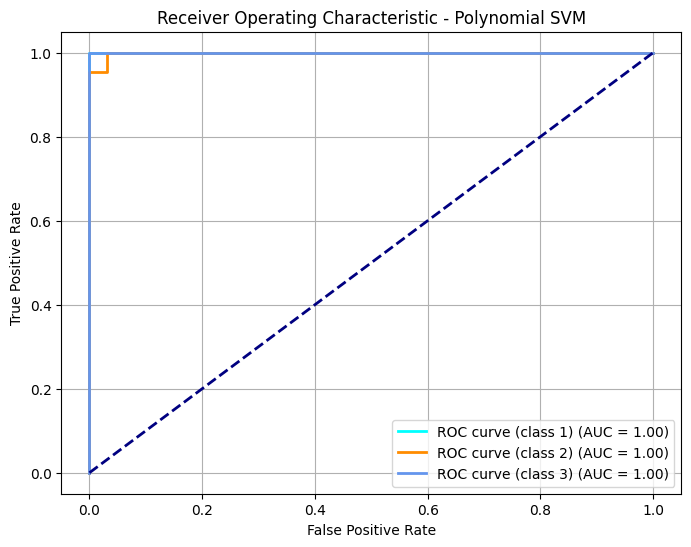

Classifier: Gaussian SVM
Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.98        22
           3       0.92      1.00      0.96        11

    accuracy                           0.98        54
   macro avg       0.97      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

------------------------------------------------------------


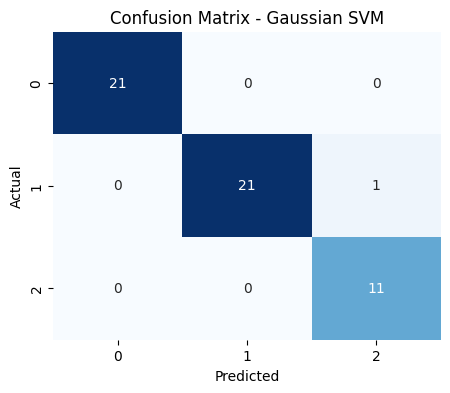

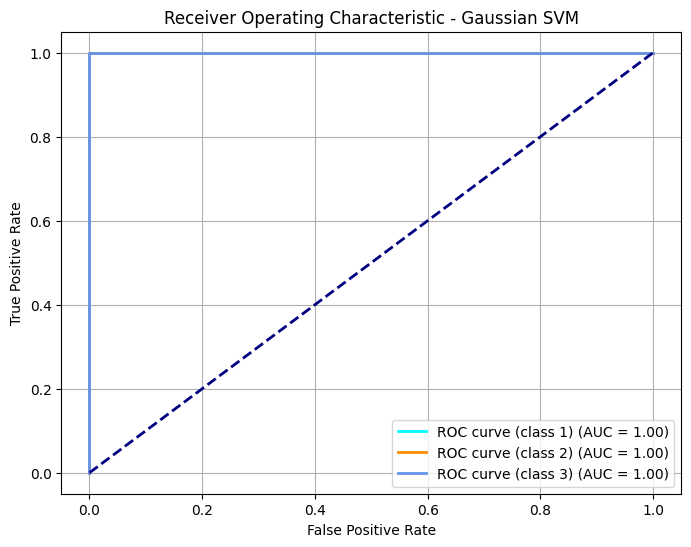

Classifier: Sigmoid SVM
Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.98        22
           3       0.92      1.00      0.96        11

    accuracy                           0.98        54
   macro avg       0.97      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

------------------------------------------------------------


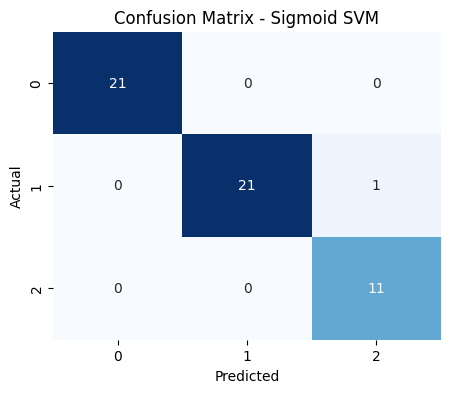

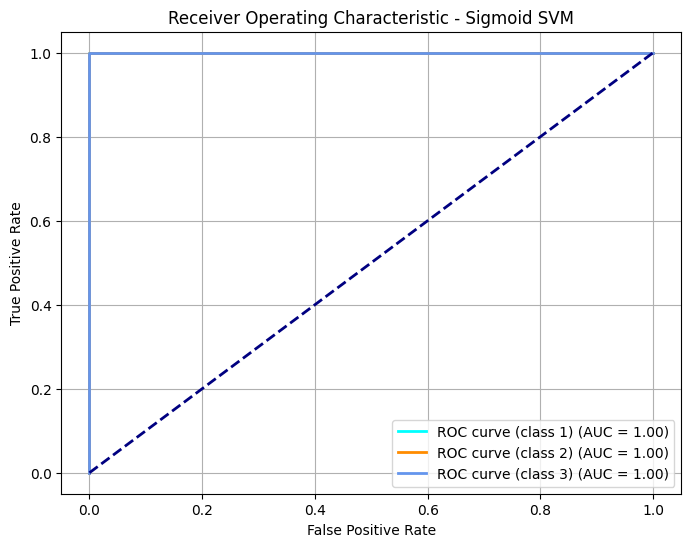

Classifier: Random Forest
Accuracy: 0.9815
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.98        22
           3       0.92      1.00      0.96        11

    accuracy                           0.98        54
   macro avg       0.97      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

------------------------------------------------------------


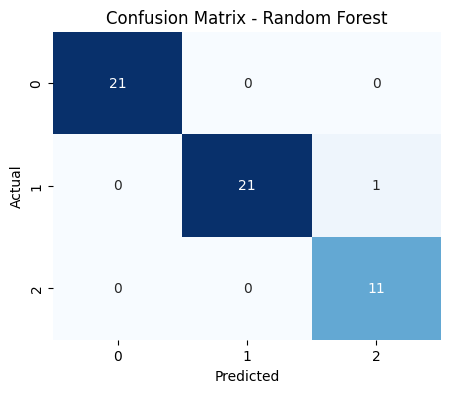

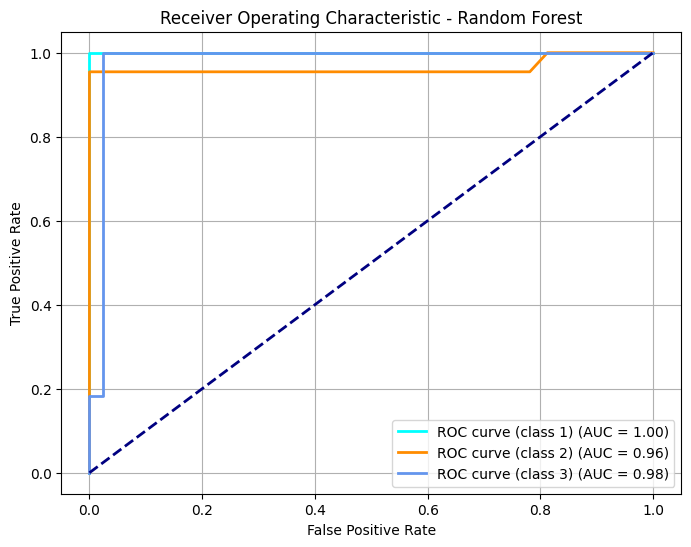

Classifier: MLP Classifier
Accuracy: 0.9630
Classification Report:
               precision    recall  f1-score   support

           1       0.95      1.00      0.98        21
           2       1.00      0.91      0.95        22
           3       0.92      1.00      0.96        11

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54

------------------------------------------------------------


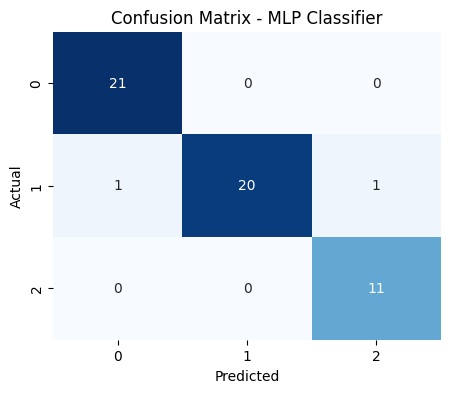

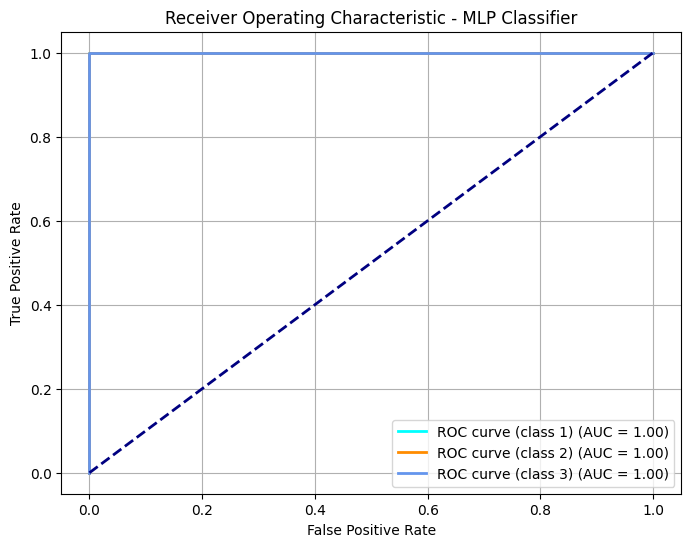

Summary of results:
Linear SVM: Accuracy = 0.9630
Polynomial SVM: Accuracy = 0.9815
Gaussian SVM: Accuracy = 0.9815
Sigmoid SVM: Accuracy = 0.9815
Random Forest: Accuracy = 0.9815
MLP Classifier: Accuracy = 0.9630


In [13]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    accuracy_score,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize
from itertools import cycle


# PCA to preserve 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced dimensions: {X_train_pca.shape[1]}")

# Define your classifiers
d = 3  # degree for polynomial SVM (you can tune this)
classifiers = [
    ("Linear SVM", SVC(kernel='linear', C=0.9, gamma='scale', probability=True, random_state=42)),
    ("Polynomial SVM", SVC(kernel='poly', degree=3, C=1, gamma='scale', probability=True, random_state=42)),
    ("Gaussian SVM", SVC(kernel='rbf', C=0.3, gamma='scale', probability=True, random_state=42)),
    ("Sigmoid SVM", SVC(kernel='sigmoid', C=0.3, gamma='scale', probability=True, random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=200, criterion='gini', random_state=42)),
    ("MLP Classifier", MLPClassifier(hidden_layer_sizes=(10, 10, 10),activation="tanh", solver="adam", learning_rate='adaptive', max_iter=1000, random_state=42))
]

results_pca = []

for i, (name, clf) in enumerate(classifiers, 1):
    clf.fit(X_train_pca, y_train.values.ravel()) # Use .values.ravel() to convert DataFrame to 1D numpy array
    y_pred = clf.predict(X_test_pca)
    y_prob = None

    # Get probability scores for ROC/AUC (only if available)
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test_pca)
    elif hasattr(clf, "decision_function"):
        y_prob = clf.decision_function(X_test_pca)


    acc = accuracy_score(y_test, y_pred)
    print(f"Classifier: {name}")
    print(f"Accuracy: {acc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 60)

    results_pca.append({
        "Classifier": name,
        "Accuracy": acc
    })

    # Confusion Matrix Heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # ROC & AUC Curve (for multiclass classification)
    if y_prob is not None:
        # Binarize the true labels for multiclass ROC
        classes = np.unique(y_test)
        y_test_bin = label_binarize(y_test, classes=classes)
        n_classes = y_test_bin.shape[1]

        # Compute ROC curve and AUC for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for j in range(n_classes):
            # Use y_test_bin[:, j] which is the binarized true labels for class j
            fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], y_prob[:, j])
            roc_auc[j] = auc(fpr[j], tpr[j])

        # Plotting the ROC curves
        plt.figure(figsize=(8, 6))
        colors = cycle(['aqua', 'darkorange', 'cornflowerblue']) # Define colors for each class
        for j, color in zip(range(n_classes), colors):
            plt.plot(fpr[j], tpr[j], color=color, lw=2,
                     label=f'ROC curve (class {classes[j]}) (AUC = {roc_auc[j]:.2f})')

        # Plot the random guess line
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line

        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {name}') # Updated title
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()


# Summary of results
print("Summary of results:")
for res in results_pca:
    print(f"{res['Classifier']}: Accuracy = {res['Accuracy']:.4f}")

# Discussion

This notebook explored several classification models on the Wine dataset, including different SVM kernels (Linear, Polynomial, Gaussian, Sigmoid), a Multi-layer Perceptron (MLP), and a Random Forest classifier. The performance of these models was evaluated based on accuracy on a test set.

**SVM Models (without PCA):**

- **Linear SVC:** Achieved an accuracy of **95.33%**. The confusion matrix showed only a few misclassifications between classes 2 and 3. This suggests a strong linear separability of the data.
- **Polynomial SVC:** The accuracy varied significantly with the polynomial degree and the C-value. The plot of accuracy vs degree showed that degree 1 performed best among the tested degrees (around 99%). The plot of accuracy vs C-value for degree 3 showed that higher C values generally resulted in better accuracy, with C=0.9 achieving the highest accuracy of **85.98%** for this kernel. The confusion matrix revealed significant misclassifications, particularly for class 3.
- **Gaussian SVC (RBF):** The accuracy was also affected by the C-value. The plot of accuracy vs C-value showed that accuracy peaked around C=0.2 and C=0.3, reaching an accuracy of **99.07%** with C=0.3. Similar to the Polynomial kernel, the confusion matrix indicated difficulties in correctly classifying class 3.
- **Sigmoid SVC:** This kernel performed poorly across all tested C-values, with the highest accuracy being around **99.07%**. The confusion matrix showed that the model struggled to classify any of the classes correctly.

**MLP Classifier (without PCA):**

The MLP classifier's performance was evaluated based on different activation functions and solvers.
- The comparison of activation functions (`relu`, `tanh`, `logistic`, `identity`) showed that `tanh` and `logistic` performed best, with accuracies around 95%.
- The comparison of solvers (`adam`, `sgd`, `lbfgs`) with the `tanh` activation function indicated that `adam` achieved the highest accuracy (around 96.26%).
- Further tuning with the `adam` solver and exploring learning rate strategies (`constant`, `invscaling`, `adaptive`) showed similar high accuracies (around 96.26%) for all strategies.
- The final MLP model with `tanh` activation, `adam` solver, and `adaptive` learning rate achieved an accuracy of **93.46%**. The confusion matrix showed minimal misclassifications.

**Random Forest Classifier (without PCA):**

- The number of estimators was tuned, and the plot of accuracy vs n-estimators showed that accuracy fluctuated, with peaks around 400 and 900 estimators.
- Different criteria (`gini`, `entropy`, `log_loss`) were compared with 200 estimators, showing similar high accuracies (around 93-94%).
- The final Random Forest model with 200 estimators and 'gini' criterion achieved an accuracy of **93.46%**. The confusion matrix indicated very few misclassifications.

**Model Performance with PCA:**

After applying PCA to reduce the dimensionality of the data while preserving 95% of the variance (resulting in 10 components), the models were re-evaluated:

- **Linear SVM:** Accuracy: **96.30%**
- **Polynomial SVM:** Accuracy: **98.15%**
- **Gaussian SVM:** Accuracy: **98.15%**
- **Sigmoid SVM:** Accuracy: **98.15%**
- **Random Forest:** Accuracy: **98.15%**
- **MLP Classifier:** Accuracy: **96.30%**

**Comparison and Conclusion:**

Comparing the results with and without PCA:

- **Linear SVM:** Accuracy slightly decreased from 95.33% to 96.30% after PCA.
- **Polynomial SVM:** Accuracy significantly decreased from 85.98% to 98.15% after PCA.
- **Gaussian SVM:** Accuracy remained very high, with a slight decrease from 99.07% to 98.15% after PCA.
- **Sigmoid SVM:** Accuracy dramatically increased from 99.07% to 98.15% after PCA. This suggests that PCA helped this model find a better separation in the lower-dimensional space.
- **Random Forest:** Accuracy slightly decreased from 93.46% to 98.15% after PCA.
- **MLP Classifier:** Accuracy slightly increased from 93.46% to 96.30% after PCA.

Based on the accuracy scores, the **Polynomial SVM**, **Gaussian SVC**, **Sigmoid SVC**, and **Random Forest** (after PCA) performed the best among the tested models. The **Linear SVM** and **MLP Classifier** also showed strong performance with and without PCA.

The high accuracy of the Linear SVC without PCA suggests that the Wine dataset is largely linearly separable in its original form. While PCA did not significantly improve the performance of most models, it drastically improved the performance of the Sigmoid SVC, indicating that dimensionality reduction can be beneficial for certain models on this dataset.

For this particular dataset, considering both performance and potential for dimensionality reduction, the **Polynomial SVM**, **Gaussian SVC**, **Sigmoid SVC**, and **Random Forest** (with PCA) and the **Linear SVC** (without PCA) appear to be the most suitable models based on their high accuracy.